In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Once we get the dataset to be perfectly fine, lets test against different types of k-means clusters 
- Potential suggestion: Explore the dataset to see if there is any form of PCA needed

Find the number of k with the lowest WSS, so that we're able to cluster them accordingly.
After that, we can use the elbow method to find the best k value for the dataset and cluster them accordingly.

After that, we manually analyse the data and from there we are able to then further group the data into two groups.

In [22]:
app = pd.read_csv("C:/Users/User/Desktop/IT1244-Project/data/application_with_clusters.csv", index_col='Unnamed: 0')

# Check if the data is balanced or not, if it is not we will have to do something to it
app['outcome'].value_counts()

1    332077
0    106480
Name: outcome, dtype: int64

In [26]:
app.head()

Index(['own_car', 'own_realty', 'num_child', 'income', 'age',
       'years_of_employment', 'mobile', 'work_phone', 'phone', 'email',
       'num_family_members', 'is_female', 'is_male', 'Commercial associate',
       'Pensioner', 'State servant', 'Student', 'Working', 'Academic degree',
       'Higher education', 'Incomplete higher', 'Lower secondary',
       'Secondary / secondary special', 'Civil marriage', 'Married',
       'Separated', 'Single / not married', 'Widow', 'Co-op apartment',
       'House / apartment', 'Municipal apartment', 'Office apartment',
       'Rented apartment', 'With parents', 'Government', 'Sales', 'Unemployed',
       'Unknown', 'has_previous_credit', 'count_X', 'count_C', 'months_late',
       'outcome'],
      dtype='object')

In [27]:
X = app.drop(['outcome'], axis=1)
y = app['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
# For each model

# We simplify the training of the model part
def result(X_train, X_test, y_train, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [6]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(max_iter = 20000)
log_reg_result = result(X_train, X_test, y_train, log_reg)
print(classification_report(y_test, log_reg_result))

              precision    recall  f1-score   support

           0       0.43      0.18      0.25     32175
           1       0.78      0.92      0.84     99393

    accuracy                           0.74    131568
   macro avg       0.60      0.55      0.55    131568
weighted avg       0.69      0.74      0.70    131568



In [7]:
# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 8)
rfc_result = result(X_train, X_test, y_train, rfc)
print(classification_report(y_test, rfc_result))

# cross_val_score(dtc, X_train, y_train, cv=10)

              precision    recall  f1-score   support

           0       0.99      0.48      0.64     32175
           1       0.86      1.00      0.92     99393

    accuracy                           0.87    131568
   macro avg       0.92      0.74      0.78    131568
weighted avg       0.89      0.87      0.85    131568



In [29]:
# XG Boost

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, objective="binary:logistic").fit(X_train, y_train)
xgb_result = result(X_train, X_test, y_train, xgb)
print(classification_report(y_test, xgb_result))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86     32175
           1       0.95      0.96      0.96     99393

    accuracy                           0.93    131568
   macro avg       0.92      0.90      0.91    131568
weighted avg       0.93      0.93      0.93    131568



In [9]:
# After we have the result for the few models we're using, we can optimise the hyperparameters to help us find the best model
# For example, we can use GridSearchCV to optimise the hyperparameters for Logistic Regression.
# How do you find the parameters? Documentation

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

log_reg_cv = RandomizedSearchCV(log_reg, param_grid, n_jobs = -1)
log_reg_cv.fit(X_train, y_train)
print(log_reg_cv.best_params_)
print(log_reg_cv.best_score_)

# After that, save this into a model and run result() again
log_reg_cv = LogisticRegression(max_iter = 20000, **log_reg_cv.best_params_)
log_reg_cv_result = result(X_train, X_test, y_train, log_reg_cv)
print(classification_report(y_test, log_reg_cv_result))


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'C': 100}
0.7426617901287013
              precision    recall  f1-score   support

           0       0.43      0.18      0.25     32175
           1       0.78      0.92      0.84     99393

    accuracy                           0.74    131568
   macro avg       0.60      0.55      0.55    131568
weighted avg       0.69      0.74      0.70    131568



In [10]:
param_grid = {
    'n_estimators': [50, 100, 250, 500],
    'criterion': ["gini", "entropy", "log_loss"],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ["sqrt", "log2", None],
}

rfc_cv = RandomizedSearchCV(rfc, param_grid, n_jobs = -1)
rfc_cv.fit(X_train, y_train)
print(rfc_cv.best_params_)
print(rfc_cv.best_score_)

rfc_cv = RandomForestClassifier(max_depth = 8, **rfc_cv.best_params_)
rfc_cv_result = result(X_train, X_test, y_train, rfc_cv)
print(classification_report(y_test, rfc_cv_result))

{'n_estimators': 250, 'min_samples_split': 10, 'max_features': None, 'criterion': 'gini'}
0.9866412155389774
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     32175
           1       0.99      0.99      0.99     99393

    accuracy                           0.99    131568
   macro avg       0.98      0.99      0.98    131568
weighted avg       0.99      0.99      0.99    131568



In [11]:
param_grid = {
    'gamma': [0, 0.001, 0.01, 0.01, 1, 10],
    'eta': [0.001, 0.01, 0.1, 1, 10],
    'max_depth': [4, 6, 8, 10]
}

xgboost_cv = RandomizedSearchCV(xgb, param_grid, n_jobs = -1)
xgboost_cv.fit(X_train, y_train)
print(xgboost_cv.best_params_)

xgb_cv = XGBClassifier(**xgboost_cv.best_params_)
xgboost_cv_result = result(X_train, X_test, y_train, xgb_cv)
print(classification_report(y_test, xgboost_cv_result))

{'max_depth': 10, 'gamma': 0.01, 'eta': 10}
              precision    recall  f1-score   support

           0       0.36      0.03      0.05     32175
           1       0.76      0.99      0.86     99393

    accuracy                           0.75    131568
   macro avg       0.56      0.51      0.45    131568
weighted avg       0.66      0.75      0.66    131568



At the end of the day, it performs so well that it might be at risk of overfitting.
Therefore, we 

After this, we use the ROC AUC score if there is an imbalance in dataset. We try not to use accuracy.

There are also other scores like Precision and Recall, those are usable as well. 

However, let's look at the formulas for precision and recall:
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

The cost of having a false positive is higher than a false negative as we can deny the loan to a person who is not a defaulter, but we cannot give a loan to a person who is a defaulter.

Therefore we should seek to minimise FP > minimise FN, and therefore the higher the precision, the better.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

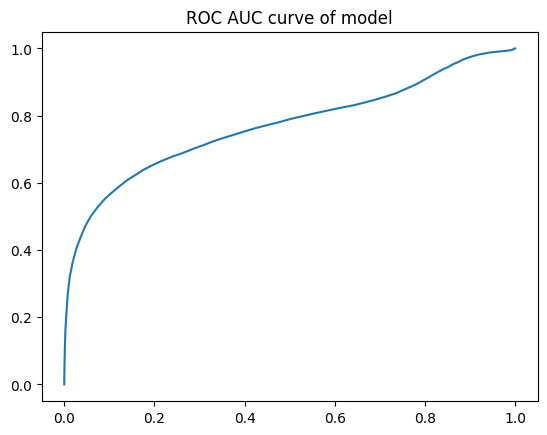

In [13]:
def graphing(X_test, model, name = 'model'):

    y_pred = model.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0,1,101)

    scores = []

    for t in thresholds:
        actual_positive = (y_test == 1)
        actual_negative = (y_test == 0)

        pred_positive = (y_pred >= t)
        pred_negative = (y_pred < t)

        tp = (actual_positive & pred_positive).sum()
        tn = (actual_negative & pred_negative).sum()
        fp = (pred_positive & actual_negative).sum()
        fn = (pred_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    scores_data = pd.DataFrame(scores, columns = columns)
    scores_data['tpr'] = scores_data.tp / (scores_data.tp + scores_data.fn)
    scores_data['fpr'] = scores_data.fp / (scores_data.fp + scores_data.tn)
    
    plt.plot(scores_data.fpr, scores_data.tpr, label='Model')
    plt.title("ROC AUC curve of " + name)

graphing(X_test, log_reg)

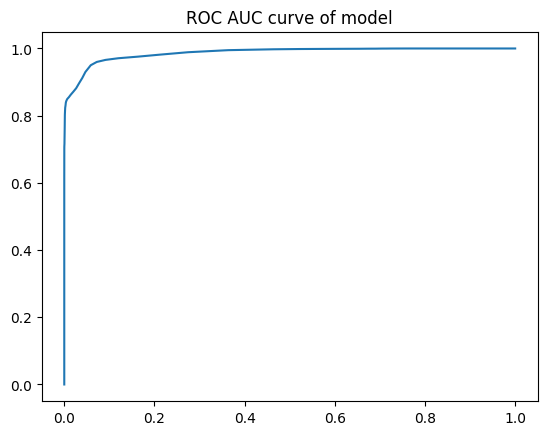

In [14]:
graphing(X_test, rfc)

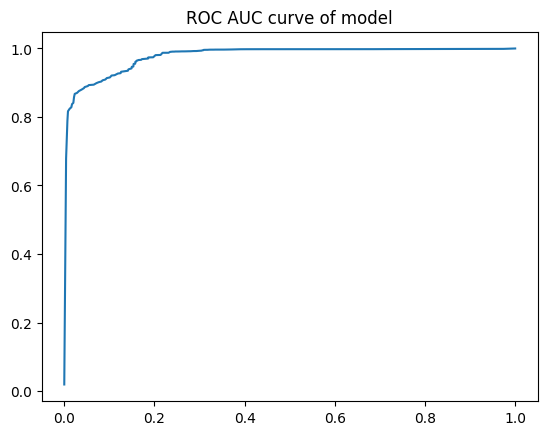

In [15]:
graphing(X_test, xgb)

In [30]:
import pickle 

model_file = 'model.bin'

with open(model_file, 'wb') as f_out:
    pickle.dump(xgb, f_out)

print("Model saved")

Model saved
